<h2>EXERCÍCIO 01:</h2>
<br>
<p>Separe os dois canais do arquivo V1PRO, onde um canal possue dados de eletromiografia e um outro canal possue dados de força. Encontrem o maior valor da força em unidades do arquivo.</p>




Dados de eletromiografia:


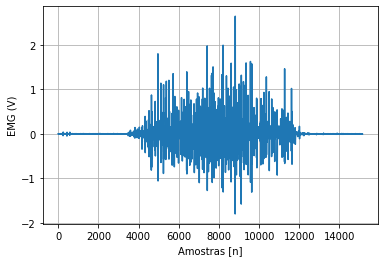

Dados de força:


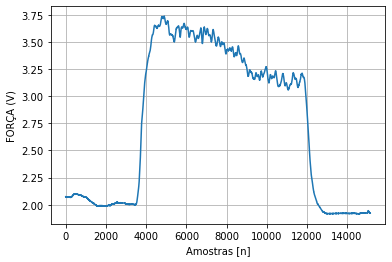

O valor máximo de força é: 3.736 V


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Importar arquivo com os dados, sep='\t' é a forma que o arquivo separa as informações,
# o header=None enumera as colunas de dados, de forma que os dados da primeira linha não fiquem como nomes das colunas.
base = pd.read_csv('V1PRO.csv', sep='\t', header=None)
# Separar a coluna 6 que é dados de eletromiografia
EM = base.iloc[:,6:7].values
# E a coluna 7 é os dados de força
forca = base.iloc[:,7:8].values
# Criar arquivo separando dados de forca e eletromiografia
np.savetxt("sep_forca.csv", forca, delimiter=";")
np.savetxt("sep_EM.csv", EM, delimiter=";")
# Abrir arquivos de força e EM e mostrar dados
print("Dados de eletromiografia:")
data_EM = pd.read_csv('sep_EM.csv', sep=';', header=None)
plt.plot(data_EM)
plt.grid()
plt.ylabel("EMG (V)")
plt.xlabel("Amostras [n]")
plt.show()
print("Dados de força:")
data_forca = pd.read_csv('sep_forca.csv', sep=';', header=None)
plt.plot(data_forca)
plt.grid()
plt.ylabel("FORÇA (V)")
plt.xlabel("Amostras [n]")
plt.show()
# Classificar a força máxima encontrada
forca_max = 0
# Percorrer todos os elementos do arquivo forca e substitutir a forca_max quando o elemento for maior.
for elemento in forca:
    if elemento > forca_max:
        forca_max = elemento
forca_max = float(forca_max)
print("O valor máximo de força é:",forca_max,"V")
            



<h2>EXERCÍCIO 02:</h2>
<br>
<p>O arquivo (fotocem.xlsx) apresenta coordenadas de uma imagem (cemg.jpg). Calcule o ângulo do cotovelo sendo a ordem de dados: coordenada x e y do ombro, x e y do cotovelo e x e y do punho, x e y da parte de cima da referência e x e y da parte de baixo da referência. Esta referência apresenta 100 centímetros. As coordenadas em questão foram obtidas no Paint, onde a direção do eixo y é para baixo. Corrijam a direção para cima antes de calcular o ângulo.</p>



     0    1    2    3    4    5    6   7    8    9
0  455  277  530  405  652  360  153  96  176  585
Tamanho da imagem:  (768, 1024, 3)


C:\Users\pedri\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in arccos


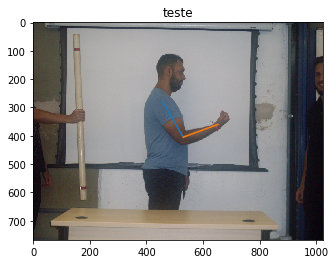

nan


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

infos = pd.read_csv('fotocem.csv', sep=',', header=None)
print(infos)
img = plt.imread("CEMG.jpg")
print("Tamanho da imagem: ",img.shape)
plt.imshow(img)
a = [455,530]
b = [277,405]
c = [652,530]
d = [360,405]
#x = [455,530,652,153,176]
#y = [277,405,360,96,585]
x = [455,530,652]
y = [277,405,360]
dot_product = np.dot(x, y)
angle = np.arccos(dot_product)
plt.plot(a,b)
plt.plot(c,d)
plt.title('teste')
plt.show()
print(angle)

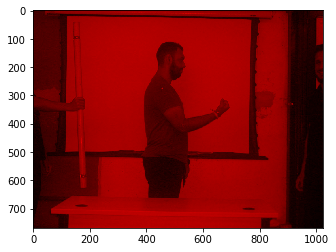

In [10]:
#Teste de manipulação da imagem
#plt.imshow(img[:,:,0], cmap='gray')
img_R = img.copy()
img_R[:,:,[1,2]]=0
plt.imshow(img_R)

In [5]:
#Teste de identificação de ângulo

import numpy as np
import math
vector_1 = [0, 1]
vector_2 = [1, 1]

unit_vector_1 = vector_1 / np.linalg.norm(vector_1)
unit_vector_2 = vector_2 / np.linalg.norm(vector_2)
dot_product = np.dot(unit_vector_1, unit_vector_2)
angle = np.arccos(dot_product)
print(unit_vector_1)
print(unit_vector_2)
print(dot_product)
print(angle*(180/math.pi))

[0. 1.]
[0.70710678 0.70710678]
0.7071067811865475
45.00000000000001
